
# LOGISTIC REGRESSION for Prediction on FB Ads
# Credit goes to Dr. Ryan @STEMplicity
## https://www.udemy.com/machine-learning-classification




# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

# STEP #1: IMPORT DATASET

In [2]:
pd = pd.read_csv("Facebook_Ads_2.csv", sep=',' , encoding='latin-1')

In [3]:
pd.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
pd.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [5]:
pd.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


# STEP #2: EXPLORE/VISUALIZE DATASET

In [6]:
total = len(pd)
clicked = pd[pd["Clicked"] == 1] # from pd the colomn pd clicked == 1
not_clicked = pd[pd["Clicked"] == 0]

In [7]:
print("Total Number of customers:",len(pd))
print("Number of customers who clicked on an ad:",len(clicked))
print("Percentage of customers who clicked on an ad:",len(clicked)/total)
print("Number of customers who clicked not:",len(not_clicked))
print("Percentage of customers who clicked not:",len(not_clicked)/total)

Total Number of customers: 499
Number of customers who clicked on an ad: 250
Percentage of customers who clicked on an ad: 0.501002004008016
Number of customers who clicked not: 249
Percentage of customers who clicked not: 0.49899799599198397


In [8]:
pd["Clicked"].value_counts()

1    250
0    249
Name: Clicked, dtype: int64

In [9]:
pd["Clicked"].value_counts(normalize=1) # or normalize = True
# sort=False, ascending=True, bins=None, dropna=False

1    0.501002
0    0.498998
Name: Clicked, dtype: float64

In [10]:
values_punctuality = pd['Clicked'].value_counts().keys().tolist()
counts_punctuality = pd['Clicked'].value_counts().tolist()

In [11]:
values_punctuality

[1, 0]

In [12]:
counts_punctuality

[250, 249]

In [13]:
pd["Clicked"].value_counts().to_frame()

,Clicked
1,250
0,249


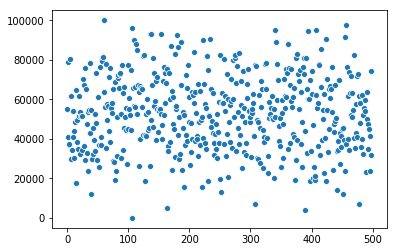

In [14]:
sns.scatterplot(data=pd["Salary"])

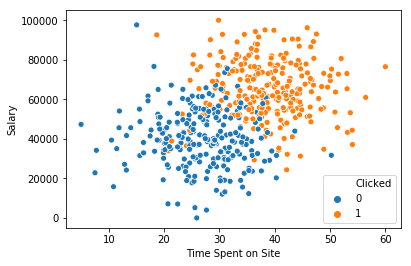

In [15]:
sns.scatterplot(pd["Time Spent on Site"],pd["Salary"],hue=pd["Clicked"])

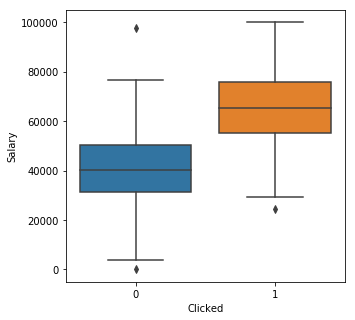

In [16]:
plt.figure(figsize = (5,5))
sns.boxplot(x = "Clicked", y="Salary", data= pd)

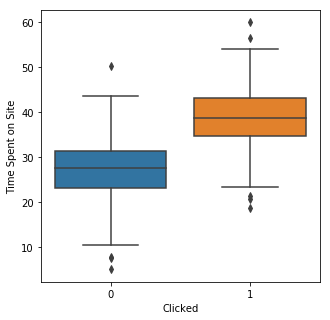

In [17]:
plt.figure(figsize = (5,5))
sns.boxplot(x = "Clicked", y="Time Spent on Site", data= pd)

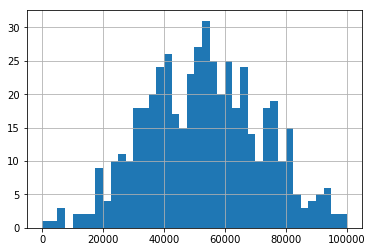

In [18]:
pd["Salary"].hist(bins=40)

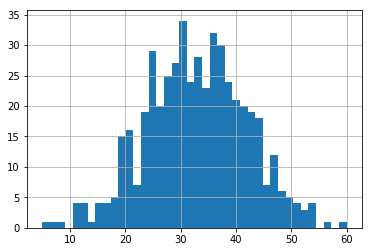

In [19]:
pd["Time Spent on Site"].hist(bins=40)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [21]:
pd.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


For the use of logistic regression you need to have only numerical data in the dataset, thats why we need to drop emails, country and names

In [24]:
df_clean = pd.drop(["Names", "emails", "Country"], axis = 1) #inpflace = True / if you want to keep it in the same variable

In [26]:
df_clean.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [27]:
targets = df_clean.drop(["Time Spent on Site", "Salary"], axis = 1)

In [28]:
targets.head()

,Clicked
0,0
1,1
2,0
3,1
4,0


## Setting X and y values

In [44]:
X = df_clean.drop("Clicked", axis = 1).values # remove the targets and take the values

In [34]:
X

array([[2.56496480e+01, 5.53300601e+04],
       [3.24561067e+01, 7.90490767e+04],
       [2.09459779e+01, 4.10986083e+04],
       [5.40393248e+01, 3.71433554e+04],
       [3.42497288e+01, 3.73551128e+04],
       [5.20099460e+01, 8.06426522e+04],
       [4.28813696e+01, 6.19083982e+04],
       [2.56769196e+01, 2.98514115e+04],
       [4.06982326e+01, 3.42811188e+04],
       [2.96873619e+01, 4.10988788e+04],
       [3.32725720e+01, 5.41270171e+04],
       [3.45308979e+01, 3.02219371e+04],
       [2.53136952e+01, 4.37639976e+04],
       [4.65407082e+01, 4.86634947e+04],
       [3.77165819e+01, 6.46959770e+04],
       [2.50567822e+01, 1.77599339e+04],
       [4.10959602e+01, 4.94633813e+04],
       [2.47615633e+01, 3.84844232e+04],
       [4.88701755e+01, 3.47744441e+04],
       [2.78338319e+01, 5.16444933e+04],
       [1.71035757e+01, 6.16617652e+04],
       [2.55977957e+01, 5.36307638e+04],
       [4.22491897e+01, 3.22150995e+04],
       [3.71359218e+01, 5.17336572e+04],
       [3.244311

In [35]:
y = df_clean["Clicked"].values

In [36]:
y

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [37]:
y2 = targets.values

In [41]:
y2

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [42]:
y3 = targets["Clicked"].values

In [43]:
y3

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [46]:
X.shape

(499, 2)

In [48]:
type(X)

numpy.ndarray

In [49]:
y.shape

(499,)

## Feature scaling with sklearn

you can improve the results by adapting the values

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [54]:
X = sc.fit_transform(X)

In [55]:
X

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

# STEP#4: MODEL TRAINING

## Divide the data in training and testing

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [65]:
X_train

array([[ 1.42362615e+00,  2.28294560e+00],
       [ 1.27842887e+00,  6.42418929e-01],
       [ 9.38760851e-01,  1.21381549e+00],
       [ 5.41314780e-01,  2.60639388e-01],
       [ 1.09531908e+00,  4.75030899e-01],
       [-1.31149405e+00, -8.81682059e-01],
       [ 3.95482032e-01,  1.85281787e+00],
       [ 1.23876495e+00,  6.50963986e-01],
       [ 3.93751298e-01, -2.41424855e-01],
       [-2.40764550e-01, -3.10185529e-01],
       [ 1.24585679e+00,  1.41180492e+00],
       [-7.96458904e-01, -1.21483411e+00],
       [-9.34969620e-01, -1.70625532e-01],
       [ 8.55264296e-01, -9.81324726e-01],
       [-1.91132465e-01,  4.15148736e-01],
       [-1.10130678e+00, -9.69857225e-01],
       [ 1.29105293e+00,  1.18761807e+00],
       [-5.13376111e-01,  2.30822516e-01],
       [ 1.50793876e+00,  5.77561928e-01],
       [-1.58972467e-01, -1.50307162e+00],
       [-8.42943155e-01, -4.29119606e-01],
       [ 3.71283295e-01, -1.24101139e+00],
       [-1.50339446e+00, -3.88461766e-01],
       [-1.

In [62]:
X.shape 

(499, 2)

In [60]:
X_train.shape # 20% von 500 = 400


(399, 2)

In [61]:
X_test.shape

(100, 2)

In [63]:
y_train.shape

(399,)

In [64]:
y_test.shape

(100,)

## Load the model

In [66]:
from sklearn.linear_model import LogisticRegression

### Determine classifier

In [68]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# STEP#5: MODEL TESTING

## Model testing on the training data set

In [72]:
y_predict_train = classifier.predict(X_train) # used the training data on our trained model 

In [71]:
y_predict_train # output of the predict target values of the training data

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [73]:
y_train # actual training data

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

## Visualize the difference between prediction with true outcome through confusion matrix

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
cm = confusion_matrix(y_train, y_predict_train)

In [77]:
cm

array([[184,  17],
       [ 13, 185]], dtype=int64)

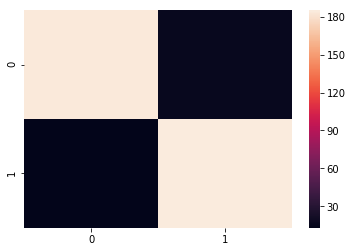

In [78]:
sns.heatmap(cm)

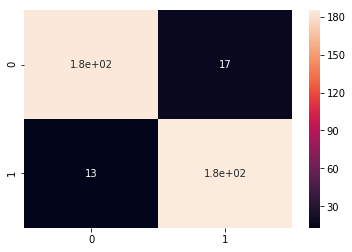

In [79]:
sns.heatmap(cm, annot = True)

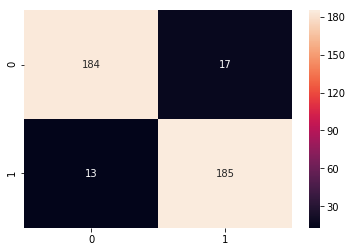

In [80]:
sns.heatmap(cm, annot = True, fmt= "d")

## Model testing on the testing data set

In [84]:
y_predict_test = classifier.predict(X_test) # use test data on our trained model 

In [85]:
y_predict_test.shape

(100,)

In [87]:
cm2 = confusion_matrix(y_test, y_predict_test)

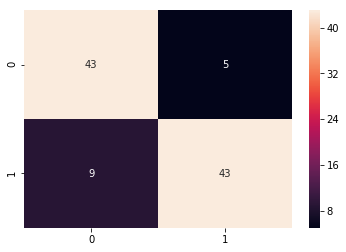

In [88]:
sns.heatmap(cm2, annot=True,fmt= "d")

### Setup classifcation report

In [90]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       201
           1       0.92      0.93      0.93       198

   micro avg       0.92      0.92      0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



In [91]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


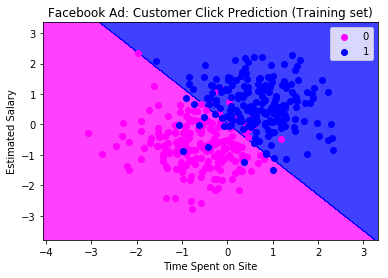

In [92]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


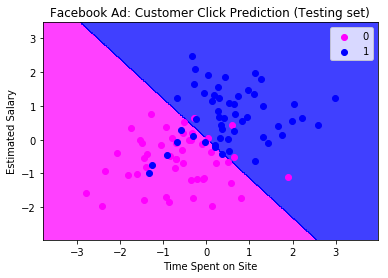

In [93]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

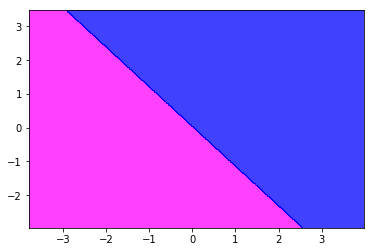

In [97]:
# Visualising the grid
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))